In [1]:
import tensorflow as tf
from sklearn.datasets import load_boston
from sklearn.preprocessing import scale
from matplotlib import pyplot as plt

### We will load the Data

In [4]:
#Get the data
#True in load_boston means to give the input and output values seperately
total_features,total_prices=load_boston(True)

#Keep 300 samples for training
train_features=scale(total_features[:300])
train_prices=total_prices[:300]

#Keep 100 for Validation
valid_features=scale(total_features[300:400])
valid_prices=total_prices[300:400]

#Keep remainng samples for test
test_features=scale(total_features[400:])
test_prices=total_prices[400:]


### We will define the weights

In [12]:
w=tf.Variable(tf.truncated_normal([13,1],mean=0.0,stddev=1.0,dtype=tf.float64))
b=tf.Variable(tf.zeros(1,dtype=tf.float64))

### Define function which calculates predicition and error

In [10]:
def calc(x,y):
    #returns predictions and error
    predictions=tf.add(b,tf.matmul(x,w))
    error=tf.reduce_mean(tf.square(y-predictions))
    return [predictions,error]

In [13]:
y, cost=calc(train_features,train_prices)
# Feel free to change these 2 values:
learning_rate=0.025
epochs=3000
points=[[],[]]

In [14]:
init=tf.global_variables_initializer()
optimizer=tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

672.2184855765735
78.78744704277482
78.73356020870298
78.72720107763203
78.72578071459229
78.72542929503952
78.72533551850123
78.7253091485822
78.72530147963523
78.72529920325596
78.72529851940082
78.72529831254103
78.72529824972281
78.72529823060435
78.72529822477856
78.7252982230021
78.7252982224602
78.72529822229482
78.72529822224438
78.72529822222897
78.7252982222243
78.72529822222285
78.72529822222239
78.7252982222223
78.72529822222225
78.72529822222224
78.7252982222222
78.72529822222224
78.72529822222222
78.72529822222224


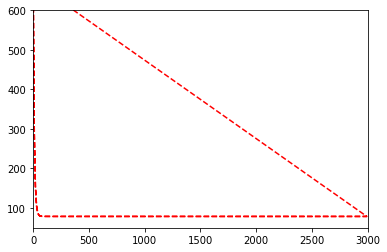

Validation error = 104.34367777777747 

Test error = 123.33357347589039 



In [17]:
with tf.Session() as sess:
    sess.run(init)
    
    for i in list(range(epochs)):
        
        sess.run(optimizer)
        
        if i%10 == 0:
            points[0].append(i+1)
            points[1].append(sess.run(cost))
            
        if i%100 == 0:
            print(sess.run(cost))
                
    plt.plot(points[0],points[1],'r--')
    plt.axis([0,epochs,50,600])
    plt.show()
    valid_cost=calc(valid_features,valid_prices)[1]
    print('Validation error =', sess.run(valid_cost), '\n')
    test_cost=calc(test_features,test_prices)[1]
    print('Test error =', sess.run(test_cost), '\n')

In [ ]:
valid_prices